# Lambda Function

Construct and plot the lambda function, defined as:
$$
\Lambda(q,x) := \sum_{i=0}^{n} |l_i(x)| 
$$

In [1]:
# This is used for plots and numpy
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
def lagrange_basis(xi, i):
    def func(x):
        assert i<len(xi) and i>=0, 'Out of range: 0 < i < len(xi)'
        ret = 1;
        for xj in xi[range(i)+range(i+1,len(xi))]:
            p = (x-xj)/(xi[i]-xj)
            ret *= p
        return ret
    return func

Test your implementation, plotting $l_i(x)$ for five equally spaced points.

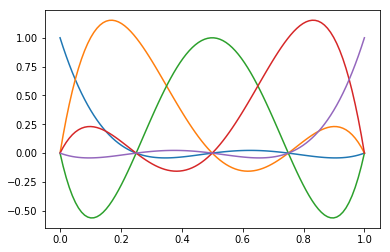

In [3]:
# YOUR CODE HERE
#raise NotImplementedError()
points=linspace(0,1,5)
l=[lagrange_basis(points,i) for i in range(len(points))]

x=linspace(0,1,100)
y=[l[i](x) for i in range(len(l))]
yy=matrix(y).T
_=plot(x,yy)



In [4]:
# YOUR CODE HERE
#raise NotImplementedError()
def lambda_function(x):
    def func(_x):
        result=0
        for i in range(len(x)):
            result+=abs(lagrange_basis(x,i)(_x))
        return result
    return func


In [5]:
from numpy.testing import *

assert_equal(lambda_function(linspace(0,1,3))(.25),1.25)
assert_almost_equal(lambda_function(linspace(0,1,5))(.3),1.2464,decimal=8)

Plot $\Lambda(q)(x)$ for equispaced nodes on the interval $[0,1]$ for 3, 5, and 7 equispaced nodes respectively. Comment the result.

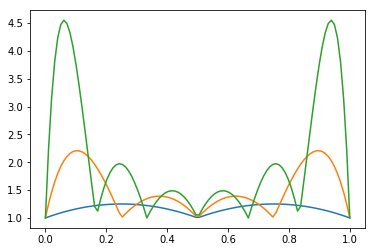

In [6]:
# YOUR CODE HERE
#raise NotImplementedError()

points=[linspace(0,1,nodes) for nodes in [3,5,7]]
lambdas=[lambda_function(_points) for _points in points]


x=linspace(0,1,100)
y=[lambdaF(x) for lambdaF in lambdas]
yy=matrix(y).T
_=plot(x,yy)

More nodes produce larger oscillations, and considering a fixed number of nodes the amplitude of the oscillations grows going far from the middle point x=0.5.

## Chebyshev Nodes

Chebyshev nodes are defined as:
$$
x_k = cos\left(\frac{2k-1}{2n} \pi \right), k = 1,\ldots,n.
$$
Write a function to evaluate then for a given $n$.


In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
def chebyshev_nodes(n):
    return array([cos((2*k-1)*pi/(2*n)) for k in range(1,n+1)])

In [8]:
assert_almost_equal(chebyshev_nodes(5),[  9.51056516e-01, 5.87785252e-01,   6.12323400e-17,  -5.87785252e-01,
  -9.51056516e-01],decimal=8)
assert_almost_equal(chebyshev_nodes(7),[  9.74927912e-01,   7.81831482e-01,   4.33883739e-01,   6.12323400e-17,
  -4.33883739e-01,  -7.81831482e-01,  -9.74927912e-01],decimal=8)


Plot the location of chebyshev nodes on the unit circle, and on the orizontal axis.

 - plot the positive sector of a cirumference with center $0$ and radius $1$.
 - plot the location of chebicev points on the cirumference, suggested plot option is `'*'`.
 - plot projection lines from the circle center to chebyshev nodes projected on the circumference.
 - plot projection lines from chebyshev nodes projected on the circumference to chebyshev nodes on the horizontal axis.
 - plot chebyshev nodes, suggested plot option is `'o'`.
 - make sure the axis are such that the resulting plot is truly a circle...

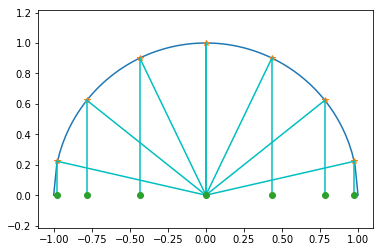

In [9]:
# YOUR CODE HERE
#raise NotImplementedError()
yc = lambda x: (1-x**2)**0.5
x=linspace(-1,1,100)
y=yc(x)
nodes=chebyshev_nodes(7)
yn=yc(nodes)
_=plot(x,y)
_=plot(nodes,yn,'*')
for i in range(0,len(nodes)):
    _=plot([nodes[i],0],[yn[i],0],'c')
    _=plot([nodes[i],nodes[i]],[yn[i],0],'c')
_=plot(nodes,zeros(len(nodes)),'o')
_=axis('equal')

Plot $\Lambda(q)(x)$ for chebyshev nodes on the interval $[x_0,x_n]$ for 3, 5, and 7 nodes respectively. Comment the result.

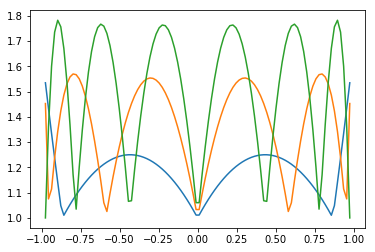

In [10]:
# YOUR CODE HERE
#raise NotImplementedError()
points=[array(chebyshev_nodes(nodes)) for nodes in [3,5,7]]
lambdas=[lambda_function(_points) for _points in points]


x=linspace(points[2][0],points[2][-1],100)
y=[lambdaF(x) for lambdaF in lambdas]
yy=matrix(y).T
_=plot(x,yy)

More nodes produce larger oscillations but not so large as equispaced nodes, and considering a fixed number of nodes the amplitude of the oscillations is constant.

Define a function `function_norm` that returns $||f(x)||\infty$ with $x\in[a,b]$ (default to $[0,1]$). To keep the implementation simple, evaluate the given function over $2^n+1$ points and return the maximum value. Any smarter and correct implementation is welcome. $n$ should be selectable at run time, and it should be by default equal to 20 (rhoughly a million points)

In [11]:
# YOUR CODE HERE
#raise NotImplementedError()
def function_norm(f,a=0,b=1,n=20):
    points=linspace(a,b,2**n+1)
    return max([abs(f(p)) for p in points])


In [12]:
print lambda_function(linspace(0,1,7))(.2)
print lambda_function(linspace(0,1,7))(linspace(0,1,2**2+1))
assert_almost_equal(function_norm(lambda_function(linspace(0,1,7)),0,1,10),4.54922445348, decimal=5)
assert_almost_equal(function_norm(lambda_function(linspace(0,1,5)),0,1,10),2.20780651848, decimal=5)

xi = chebyshev_nodes(7)
assert_almost_equal(function_norm(lambda_function(xi),xi[0],xi[-1]),1.78252988655, decimal=5)

xi = chebyshev_nodes(5)
assert_almost_equal(function_norm(lambda_function(xi),xi[0],xi[-1]),1.57016748842, decimal=5)

1.66304
[ 1.          1.96679688  1.          1.96679688  1.        ]


Evaluate the $||\Lambda(q)||_{\infty}$ for degree from 1 to 7, for equispaced points, and for chebyshev nodes. Store the corresponding values in two different arrays `norm_l_eq`, and `norm_l_ch`.

In [13]:
# YOUR CODE HERE
#raise NotImplementedError()
nodesRange=range(1,8)
points=[linspace(0,1,nodes) for nodes in nodesRange]
lambdas=[lambda_function(_points) for _points in points]
norm_l_eq=[function_norm(l) for l in lambdas]

points=[array(chebyshev_nodes(nodes)) for nodes in nodesRange]
lambdas=[lambda_function(_points) for _points in points]
norm_l_ch=[function_norm(lambdas[l],points[l][0],points[l][-1]) for l in range(0,len(lambdas))]

In [14]:
assert_almost_equal(norm_l_eq,[1.,1.,1.25,1.63113031,2.2078244,3.10630116,4.54934179], decimal=5)
assert_almost_equal(norm_l_ch,[1.,1.,1.25,1.42987272,1.57016749,1.68514046,1.78252989], decimal=5)

Plot the $||\Lambda(q,x)||_{\infty}$ for degree from 1 to 7, for equispaced points, and for chebyshev nodes.

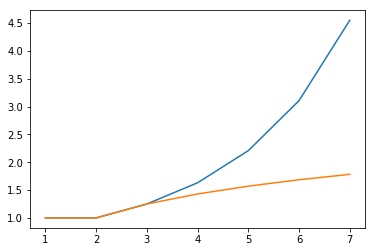

In [15]:
# YOUR CODE HERE
#raise NotImplementedError()
_=plot(nodesRange,norm_l_eq)
_=plot(nodesRange,norm_l_ch)

# Bernstein Basis
Write a function that returns the ith Bernstein Basis of order $n$, using the standard definition: 
$$
B_{i,n}(t) = \binom{n}{i} t^i(1-t)^{n-i}
$$

In [16]:
# YOUR CODE HERE
#raise NotImplementedError()
import scipy.special
def binom(n,k):
    #return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))
    return scipy.special.binom(n,k)

In [17]:
# YOUR CODE HERE
#raise NotImplementedError()
def bernstein_polynomial(n, i):
    def func(t):
        ret = binom(n,i)*(t**i)*(1-t)**(n-i);
        return ret
    return func

In [18]:
expected = [[0.48999999999999994, 0.42, 0.09], [0.3429999999999999, 0.4409999999999999, 0.189, 0.026999999999999996], [0.24009999999999995, 0.4115999999999999, 0.2646, 0.07559999999999999, 0.0081], [0.16806999999999994, 0.3601499999999999, 0.3086999999999999, 0.13229999999999997, 0.028349999999999993, 0.0024299999999999994]]

for n in range(2,3):
    for i in range(0,n+1):
        b = bernstein_polynomial(n,i)
        assert_almost_equal(b(.3),expected[n-2][i],decimal=8)

Implement the recursive definition of the bernstein polynomial:
$$
B_{k,n}(t) = (1-t)\cdot B_{k,n-1}(t)+t\cdot B_{k-1,n-1}(t)
$$

 - if $k < 0\ \mathrm{or}\ i > n$ then $B_{k,n} = 0$. 
 - if $k = 0\ \mathrm{and}\ n =0$ then $B_{k,n} = 1$. 

In [19]:
# YOUR CODE HERE
#raise NotImplementedError()
def bernstein_recursive(n,k):
    if(k<0 or k>n):
        return lambda t: 0
    elif(k==0 and n==0):
        return lambda t: 1
    else:
        return lambda t: (1-t)*bernstein_recursive(n-1,k)(t)+t*bernstein_recursive(n-1,k-1)(t)

In [20]:
expected = [[0.48999999999999994, 0.42, 0.09], [0.3429999999999999, 0.4409999999999999, 0.189, 0.026999999999999996], [0.24009999999999995, 0.4115999999999999, 0.2646, 0.07559999999999999, 0.0081], [0.16806999999999994, 0.3601499999999999, 0.3086999999999999, 0.13229999999999997, 0.028349999999999993, 0.0024299999999999994]]

for n in range(2,3):
    for i in range(0,n+1):
        b = bernstein_recursive(n,i)
        assert_almost_equal(b(.3),expected[n-2][i],decimal=8)

Implement power basis formula:
$$
B_{k,n}(t) = \sum_{i=k}^n(-1)^{i-k}\binom{n}{i}\binom{i}{k}t^i
$$

In [21]:
# YOUR CODE HERE
#raise NotImplementedError()
def bernstein_power_basis(n,k):
    return lambda t: sum([((-1)**(i-k))*binom(n,i)*binom(i,k)*(t**i) for i in range(k,n+1)])

In [22]:
expected = [[0.48999999999999994, 0.42, 0.09], [0.3429999999999999, 0.4409999999999999, 0.189, 0.026999999999999996], [0.24009999999999995, 0.4115999999999999, 0.2646, 0.07559999999999999, 0.0081], [0.16806999999999994, 0.3601499999999999, 0.3086999999999999, 0.13229999999999997, 0.028349999999999993, 0.0024299999999999994]]

for n in range(2,3):
    for i in range(0,n+1):
        b = bernstein_power_basis(n,i)
        assert_almost_equal(b(.3),expected[n-2][i],decimal=8)

Plot all basis obtained through the "definition" implementation and through the "power basis" implementation for n=20,40,80,100. Give an explanation for what you observe.

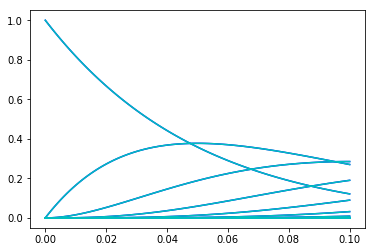

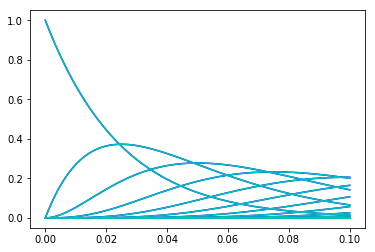

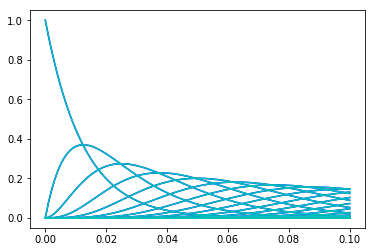

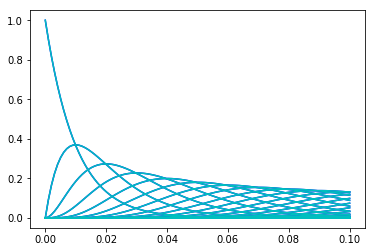

In [23]:
# YOUR CODE HERE
#raise NotImplementedError()
ns=[20,40,80,100]
x=linspace(0,0.1,100)
for n in ns:
    definitions=[bernstein_polynomial(n,i) for i in range(0,n)]
    powers=[bernstein_power_basis(n,i) for i in range(0,n)]
    y=[basis_i(x) for basis_i in definitions]
    yy=matrix(y).T
    _=plot(x,yy,'b')
    y=[[basis_i(x_i) for x_i in x] for basis_i in powers]
    yy=matrix(y).T
    _=plot(x,yy,'c')
    show()


YOUR ANSWER HERE

Given the basis functions above, construct the Bernstein approximation of a continuous function, defined as:
$$
B_n(f)(t) := \sum_{i=0}^{n} B_{i,n} (t) * f(i/n) 
$$

In [24]:
# YOUR CODE HERE
#raise NotImplementedError()
def bernstein_interpolation(n, f):
    return lambda t: sum([f(float(i)/n)*bernstein_polynomial(n,i)(t) for i in range(0,n+1)],axis=0)


In [25]:
func = lambda t : sin(2*pi*t)
bi = bernstein_interpolation(3,func)
expected = [  0.00000000e+00,1.92450090e-01,-1.92450090e-01,-2.44929360e-16]
assert_almost_equal(bi(linspace(0,1,4)),expected,decimal=8)
bi = bernstein_interpolation(15,func)
expected = [  0.00000000e+00,6.50601790e-01,-6.50601790e-01,-2.44929360e-16]
assert_almost_equal(bi(linspace(0,1,4)),expected,decimal=8)

Test your implementation, plotting the bernstein interpolation of $\sin(2\pi x)$ for different degrees:

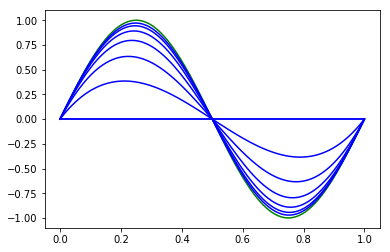

In [26]:
# YOUR CODE HERE
#raise NotImplementedError()
ns=[2**n for n in range(0,8)]
x=linspace(0,1,100)

func = lambda t : sin(2*pi*t)
bin = [bernstein_interpolation(n,func) for n in ns]
y=[bi(x) for bi in bin]
yy=matrix(y).T
_=plot(x,func(x),'g')
_=plot(x,yy,'b')

Given tolerance `tol` for the the function `func`, find the order $n$ that satisfies $\mathtt{tol}<||f(x)||_\infty$. Use the `function_norm` previously implemented.

In [27]:
# YOUR CODE HERE
#raise NotImplementedError()
def find_order_given_tolerance(f,tol,a=1,b=1,middle=False):
    if(middle):
        if(a==b):
            return a
        m=(a+b)/2
        bi = bernstein_interpolation(m,f)
        d=lambda x:bi(x)-f(x)
        e=function_norm(d,0,1,10)
        if(e>=tol):
            return find_order_given_tolerance(f,tol,m+1,b,middle)
        return find_order_given_tolerance(f,tol,a,m,middle)
        
    bi = bernstein_interpolation(b,f)
    d=lambda x:bi(x)-f(x)
    e=function_norm(d,0,1,10)
    if(e>=tol):
        return find_order_given_tolerance(f,tol,b+1,b+50)
    else:
        return find_order_given_tolerance(f,tol,a,b,True)


In [28]:
func = lambda t : sin(2*pi*t)
assert_equal(find_order_given_tolerance(func,.05),77)

h = lambda x: abs(x-.5)
assert_equal(find_order_given_tolerance(h,.05),64)

g = lambda x: 1/(1+(10*x-5)**2)
assert_equal(find_order_given_tolerance(g,.1),187)